In [ ]:
!pip install tensorflow-probability==0.8.0rc0

     |████████████████████████████████| 2.5 MB 5.1 MB/s 
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.15.0
    Uninstalling tensorflow-probability-0.15.0:
      Successfully uninstalled tensorflow-probability-0.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 1.1.1 which is incompatible.


In [ ]:
pip install shap

     |████████████████████████████████| 371 kB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509249 sha256=30a1a6266025c40d36672db4a4e4f615307b6497c2f46d572ddb26c51b7b8bae
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [ ]:
import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import shap
import keras.backend as K
import json

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Model
import tensorflow.python.keras.backend as K
sess = K.get_session()

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
shap.initjs()

In [ ]:
def visualize_model_decisions(shap_values, x, labels=None, figsize=(20, 30)):
    
    colors = []
    for l in np.linspace(1, 0, 100):
        colors.append((30./255, 136./255, 229./255,l))
    for l in np.linspace(0, 1, 100):
        colors.append((255./255, 13./255, 87./255,l))
    red_transparent_blue = LinearSegmentedColormap.from_list("red_transparent_blue", colors)

    multi_output = True
    if type(shap_values) != list:
        multi_output = False
        shap_values = [shap_values]

    # make sure labels
    if labels is not None:
        assert labels.shape[0] == shap_values[0].shape[0], "Labels must have same row count as shap_values arrays!"
        if multi_output:
            assert labels.shape[1] == len(shap_values), "Labels must have a column for each output in shap_values!"
        else:
            assert len(labels.shape) == 1, "Labels must be a vector for single output shap_values."

    # plot our explanations
    fig_size = figsize
    fig, axes = plt.subplots(nrows=x.shape[0], ncols=len(shap_values) + 1, figsize=fig_size)
    if len(axes.shape) == 1:
        axes = axes.reshape(1,axes.size)
    for row in range(x.shape[0]):
        x_curr = x[row].copy()

        # make sure
        if len(x_curr.shape) == 3 and x_curr.shape[2] == 1:
            x_curr = x_curr.reshape(x_curr.shape[:2])
        if x_curr.max() > 1:
            x_curr /= 255.
        
        axes[row,0].imshow(x_curr)
        axes[row,0].axis('off')
        
        # get a grayscale version of the image
        if len(x_curr.shape) == 3 and x_curr.shape[2] == 3:
            x_curr_gray = (0.2989 * x_curr[:,:,0] + 0.5870 * x_curr[:,:,1] + 0.1140 * x_curr[:,:,2]) # rgb to gray
        else:
            x_curr_gray = x_curr

        if len(shap_values[0][row].shape) == 2:
            abs_vals = np.stack([np.abs(shap_values[i]) for i in range(len(shap_values))], 0).flatten()
        else:
            abs_vals = np.stack([np.abs(shap_values[i].sum(-1)) for i in range(len(shap_values))], 0).flatten()
        max_val = np.nanpercentile(abs_vals, 99.9)
        for i in range(len(shap_values)):
            if labels is not None:
                axes[row,i+1].set_title(labels[row,i])
            sv = shap_values[i][row] if len(shap_values[i][row].shape) == 2 else shap_values[i][row].sum(-1)
            axes[row,i+1].imshow(x_curr_gray, cmap=plt.get_cmap('gray'), alpha=0.15, extent=(-1, sv.shape[0], sv.shape[1], -1))
            im = axes[row,i+1].imshow(sv, cmap=red_transparent_blue, vmin=-max_val, vmax=max_val)
            axes[row,i+1].axis('off')
        
    cb = fig.colorbar(im, ax=np.ravel(axes).tolist(), label="SHAP value", orientation="horizontal", aspect=fig_size[0]/0.2)
    cb.outline.set_visible(False)


In [ ]:
model = VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
X, y = shap.datasets.imagenet50()

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

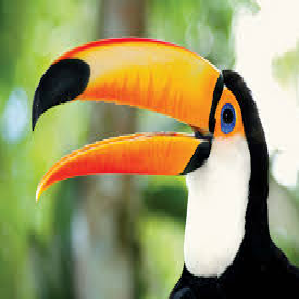

In [ ]:
image_toucan = load_img("/content/drive/MyDrive/Colab Notebooks/Interpretable Learning /SHAP/toucan.jpeg", target_size=(299,299))
image_toucan

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
IMAGE_PATH = '/content/drive/MyDrive/Colab Notebooks/Interpretable Learning /SHAP/toucan.jpeg'

In [ ]:
image_toucan = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224,224))
image_toucan = tf.keras.preprocessing.image.img_to_array(image_toucan)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

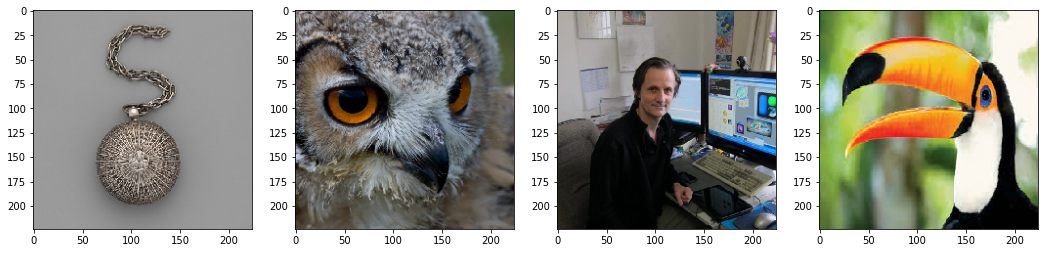

In [ ]:
to_predict = np.array([X[28], X[35], X[46], image_toucan])
fig, ax = plt.subplots(1, 4, figsize=(18,10))
ax[0].imshow(to_predict[0]/255.)
ax[1].imshow(to_predict[1]/255.)
ax[2].imshow(to_predict[2]/255.)
ax[3].imshow(to_predict[3]/255.)

In [ ]:
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)
    
# make model predictions
predictions = model.predict(preprocess_input(to_predict.copy()))

# get prediction labels
predicted_labels = [class_names.get(str(pred)) for pred in np.argmax(predictions, axis=1)]
print(predicted_labels)


[['n02999410', 'chain'], ['n01622779', 'great_grey_owl'], ['n03180011', 'desktop_computer'], ['n01843383', 'toucan']]


In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
model.layers[0].input

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

In [ ]:
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)

In [ ]:
e = shap.GradientExplainer((model.layers[7].input, model.layers[-1].output), 
                            map2layer(preprocess_input(X.copy()), 7))
shap_values, indexes = e.shap_values(map2layer(to_predict, 7), ranked_outputs=2)
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)
print(index_names)


[['chain' 'chain_mail']
 ['great_grey_owl' 'prairie_chicken']
 ['desktop_computer' 'screen']
 ['toucan' 'hornbill']]


In [ ]:
e = shap.GradientExplainer((model.layers[7].input, model.layers[-1].output), 
                            map2layer(preprocess_input(X.copy()), 7))
shap_values, indexes = e.shap_values(map2layer(to_predict, 7), ranked_outputs=2)
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)
print(index_names)


[['chain' 'chain_mail']
 ['great_grey_owl' 'prairie_chicken']
 ['desktop_computer' 'screen']
 ['toucan' 'hornbill']]


In [ ]:
visualize_model_decisions(shap_values=shap_values, x=to_predict, 
                          labels=index_names, figsize=(20, 40))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(model.layers[14].input)

Tensor("block4_conv3/Relu:0", shape=(None, 28, 28, 512), dtype=float32)


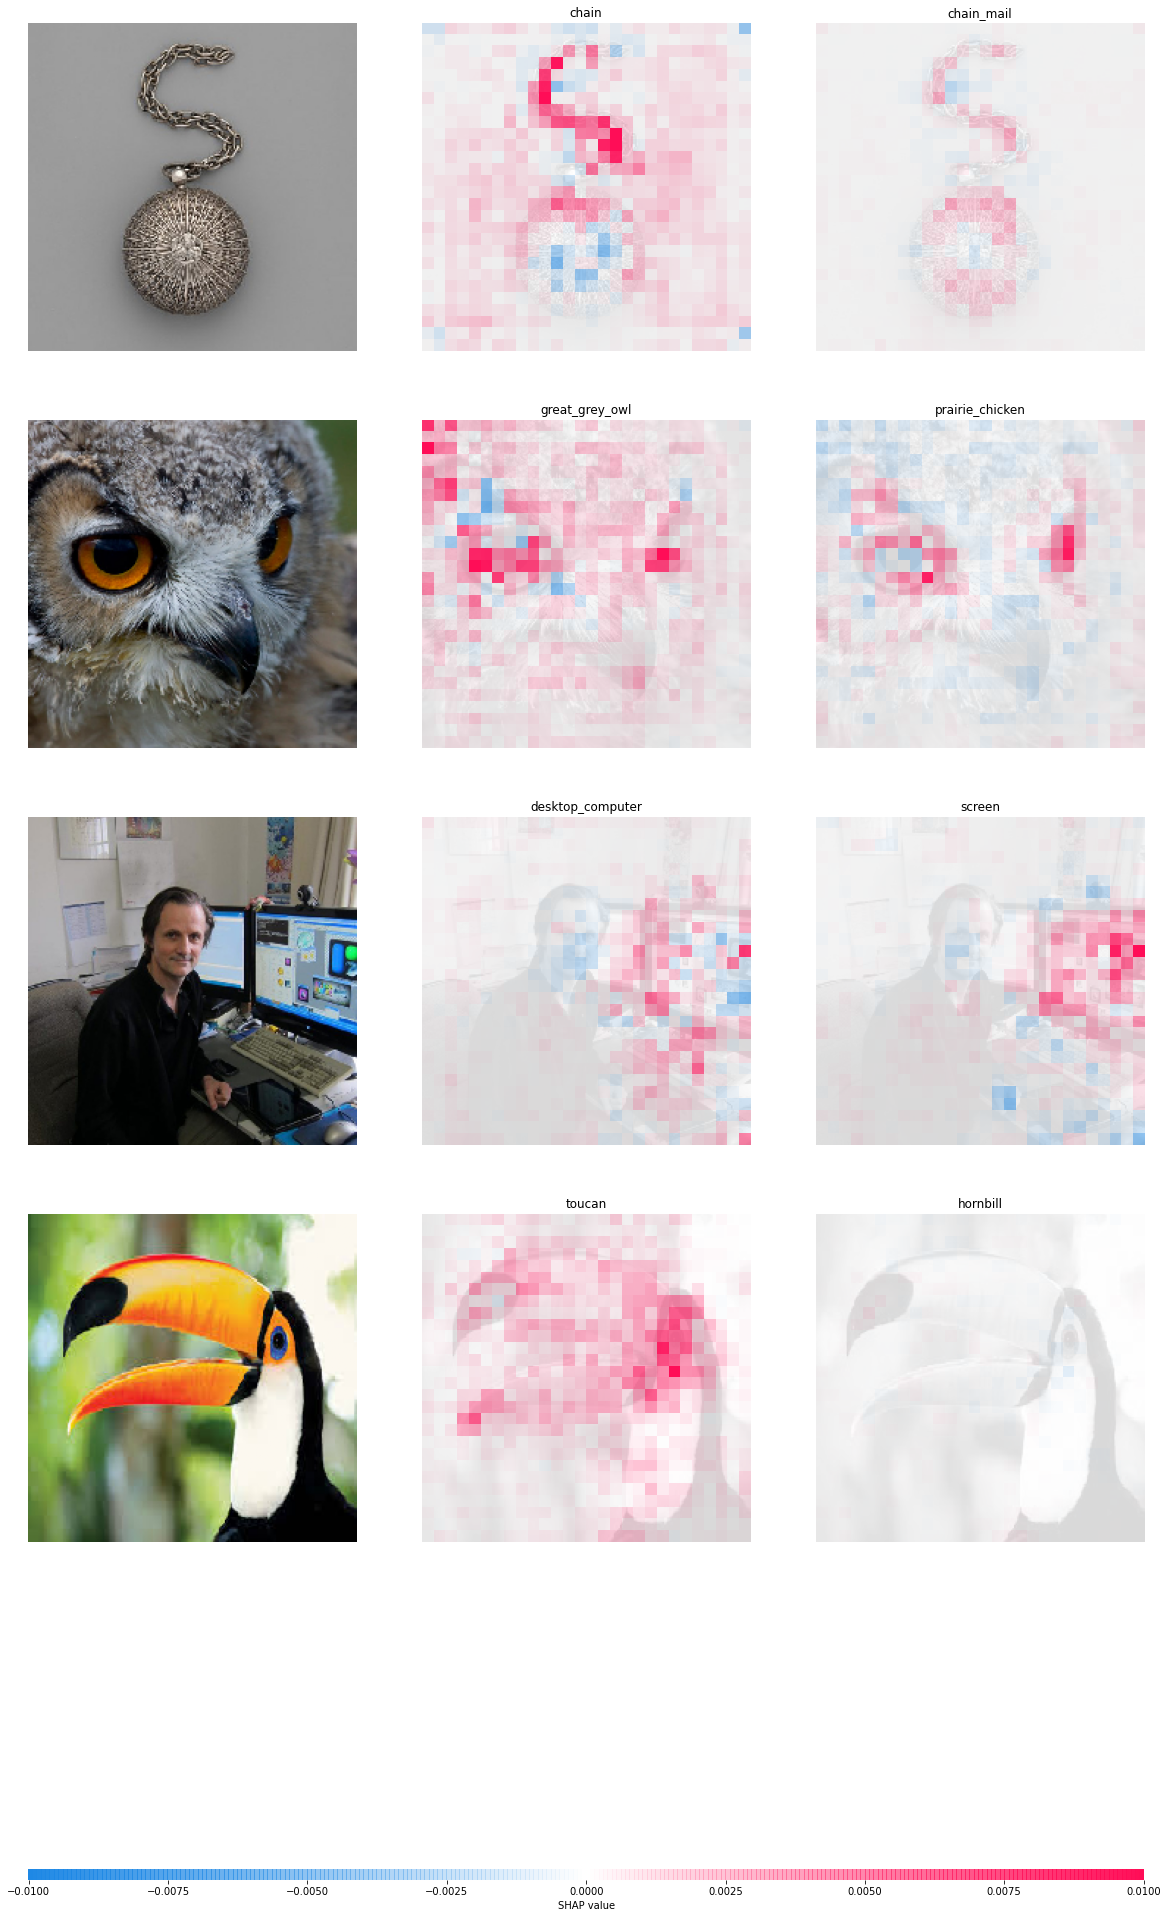

In [ ]:
e = shap.GradientExplainer((model.layers[14].input, model.layers[-1].output), 
                            map2layer(preprocess_input(X.copy()), 14))
shap_values, indexes = e.shap_values(map2layer(to_predict, 14), ranked_outputs=2)
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# visualize model decisions
visualize_model_decisions(shap_values=shap_values, x=to_predict, 
                          labels=index_names, figsize=(20, 40))

In [ ]:
  !pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

# Additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model



     |████████████████████████████████| 349.7MB 45kB/s 
     |████████████████████████████████| 3.1MB 36.9MB/s 
     |████████████████████████████████| 501kB 51.2MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
2.4.1


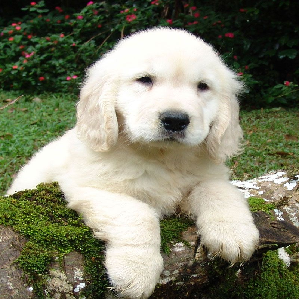

In [ ]:
image_puppy = load_img("/content/drive/MyDrive/Colab Notebooks/Interpretable Learning /SHAP/labrador_baby.png", target_size=(299,299))
image_puppy

In [ ]:
IMAGE_PATH = '/content/drive/MyDrive/Colab Notebooks/Interpretable Learning /SHAP/labrador_baby.png'

In [ ]:
image_puppy = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224,224))
image_puppy = tf.keras.preprocessing.image.img_to_array(image_puppy)

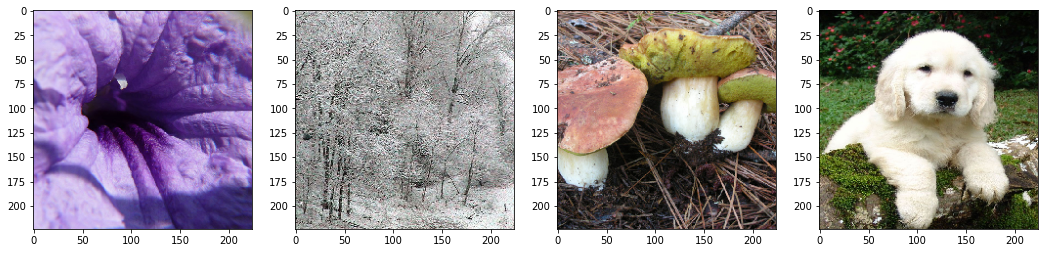

In [ ]:
to_predict = np.array([X[27], X[34], X[45], image_puppy])
fig, ax = plt.subplots(1, 4, figsize=(18,10))
ax[0].imshow(to_predict[0]/255.)
ax[1].imshow(to_predict[1]/255.)
ax[2].imshow(to_predict[2]/255.)
ax[3].imshow(to_predict[3]/255.)

In [ ]:
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)
    
# make model predictions
predictions = model.predict(preprocess_input(to_predict.copy()))

# get prediction labels
predicted_labels = [class_names.get(str(pred)) for pred in np.argmax(predictions, axis=1)]
print(predicted_labels)

[['n07714571', 'head_cabbage'], ['n03891251', 'park_bench'], ['n13054560', 'bolete'], ['n02099601', 'golden_retriever']]


In [ ]:
model.layers[0].input

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

In [ ]:
e = shap.GradientExplainer((model.layers[7].input, model.layers[-1].output), 
                            map2layer(preprocess_input(X.copy()), 7))
shap_values, indexes = e.shap_values(map2layer(to_predict, 7), ranked_outputs=2)
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)
print(index_names)

[['head_cabbage' 'cauliflower']
 ['park_bench' 'coyote']
 ['bolete' 'mushroom']
 ['golden_retriever' 'cocker_spaniel']]


In [ ]:
visualize_model_decisions(shap_values=shap_values, x=to_predict, 
                          labels=index_names, figsize=(20, 40))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
image_face = tf.keras.preprocessing.image.load_img(IMAGE_PATH_face, target_size=(299,299))
image_face = tf.keras.preprocessing.image.img_to_array(image_face)

# Tree ensemble example

In [ ]:
import xgboost
import lightgbm
import shap

In [ ]:
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

[07:50:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
X_l, y_l = shap.datasets.boston()
model_l = lightgbm.LGBMRegressor().fit(X_l, y_l)

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [ ]:
explainer = shap.Explainer(model_l)
shap_values_l = explainer(X_l)

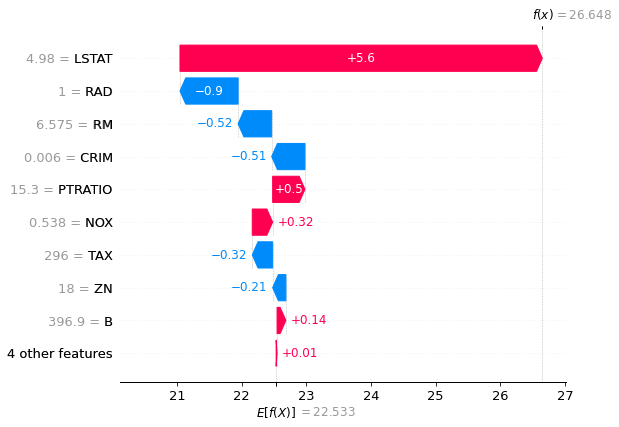

In [ ]:
shap.plots.waterfall(shap_values[0])

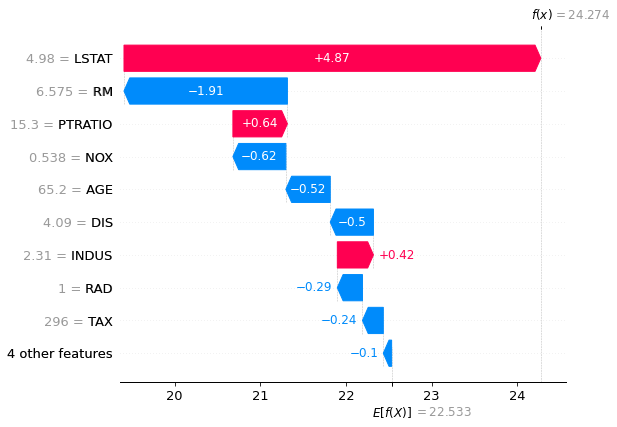

In [ ]:
shap.plots.waterfall(shap_values_l[0])

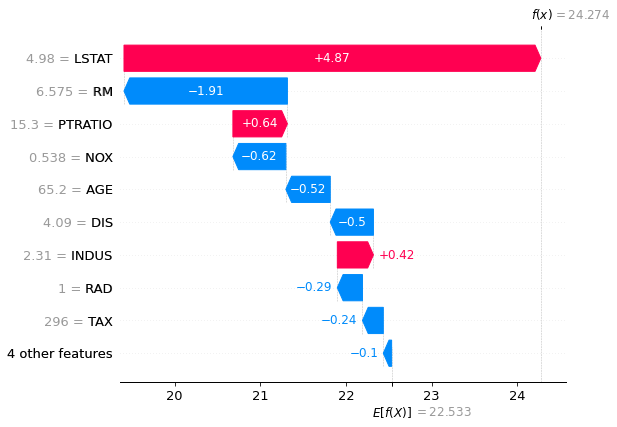

In [ ]:
shap.plots.waterfall(shap_values_l[0])

Waterfall plots are designed to display explanations for individual predictions, so they expect a single row of an Explanation object as input. The bottom of a waterfall plot starts as the expected value of the model output, and then each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.

In [ ]:
shap.initjs()

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

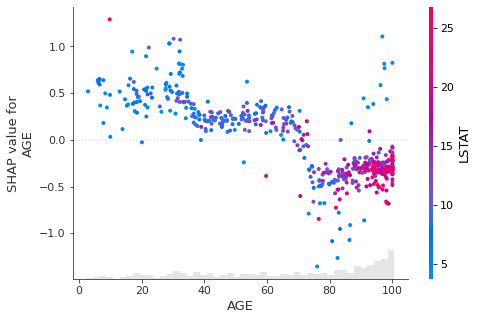

In [ ]:
shap.plots.scatter(shap_values[:, 'AGE'], color=shap_values)

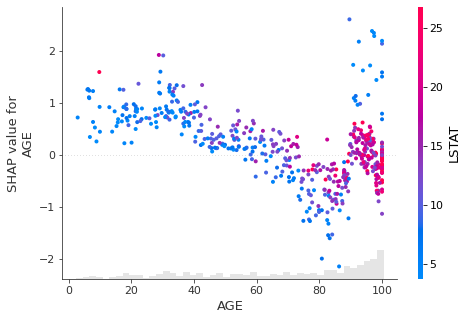

In [ ]:
shap.plots.scatter(shap_values_l[:, 'AGE'], color=shap_values)

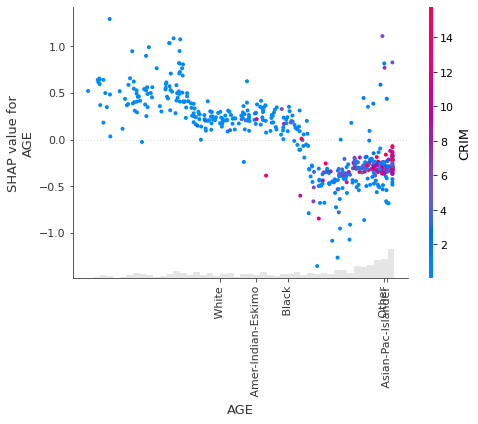

In [ ]:
X_display, y = shap.datasets.adult(display=True)
shap_values.display_data = X_display.values
shap.plots.scatter(shap_values[:, 'AGE'], color=shap_values[:,'CRIM'])

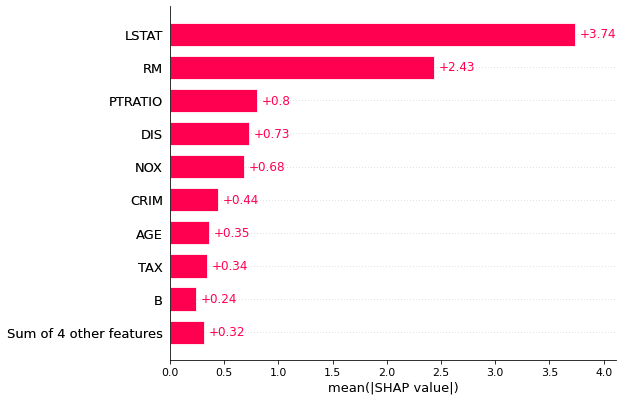

In [ ]:
shap.plots.bar(shap_values)

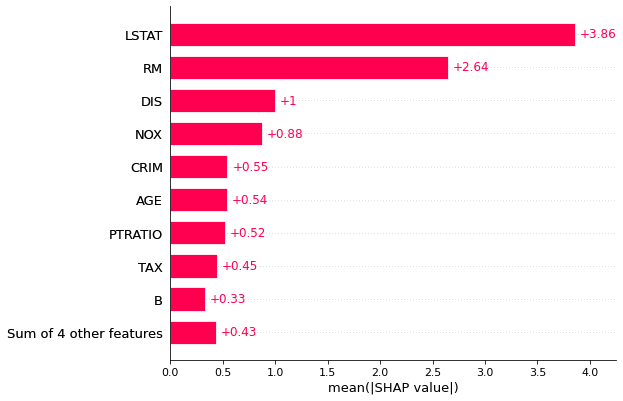

In [ ]:
shap.plots.bar(shap_values_l)

### KernelExplainer(IRIS data)

In [ ]:
import sklearn 
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import shap

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
d = sklearn.datasets.load_iris()
df = pd.DataFrame(data=d.data, columns=d.feature_names)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df, d.target, test_size=0.2, random_state=123)

In [ ]:
classifier = sklearn.linear_model.LogisticRegression()

In [ ]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=12345)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=12345,
                       verbose=0, warm_start=False)

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df)

In [ ]:
len(shap_values)

3

In [ ]:
# shapley value 계산
test_sample = X_test[0:1]
shap_values = explainer.shap_values(test_sample)

# shapley value 시각화
shap.initjs()
classNumber = 1 # 0: setosa / 1: versicolor / 2: virginica
shap.force_plot(explainer.expected_value[classNumber], 
                shap_values[classNumber], test_sample)

In [ ]:
classifier.fit(X_train, Y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
linear = classifier.fit(X_train, Y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
def print_accuracy(f):
    print("Accuracy = {0}%".format(100*np.sum(f(X_test) == Y_test)/len(Y_test)))

In [ ]:
# 설명 모델 생성
explainer = shap.KernelExplainer(classifier.predict_proba, X_train)

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
# shapley value 계산
test_sample = X_test[0:1]
shap_values = explainer.shap_values(test_sample)

# shapley value 시각화
shap.initjs()
classNumber = 0 # 0: setosa / 1: versicolor / 2: virginica
shap.force_plot(explainer.expected_value[classNumber], 
                shap_values[classNumber], test_sample)

In [ ]:
shap.initjs()
classNumber = 1 # 0: setosa / 1: versicolor / 2: virginica
shap.force_plot(explainer.expected_value[classNumber], 
                shap_values[classNumber], test_sample)

In [ ]:
shap.initjs()
classNumber = 2 # 0: setosa / 1: versicolor / 2: virginica
shap.force_plot(explainer.expected_value[classNumber], 
                shap_values[classNumber], test_sample)

In [ ]:
shap_values

[array([[-0.01723619, -0.01413301, -0.27265278, -0.00343699]]),
 array([[ 0.04013693, -0.02486754,  0.210381  , -0.00299435]]),
 array([[-0.02290073,  0.03900054,  0.06227178,  0.00643134]])]

In [ ]:
shap.plots.waterfall(shap_values)

AttributeError: ignored

In [ ]:
Y_test

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0])

In [ ]:
X_test

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
72                 6.3               2.5                4.9               1.5
112                6.8               3.0                5.5               2.1
132                6.4               2.8                5.6               2.2
88                 5.6               3.0                4.1               1.3
37                 4.9               3.6                1.4               0.1
138                6.0               3.0                4.8               1.8
87                 6.3               2.3                4.4               1.3
42                 4.4               3.2                1.3               0.2
8                  4.4               2.9                1.4               0.2
90                 5.5               2.6                4.4               1.2
141                6.9               3.1                5.1               2.3
33                 5.5               4.2                1.4               0.2
59                 5.2               2.7                3.9               1.4
116                6.5               3.0                5.5               1.8
135                7.7               3.0                6.1               2.3
104                6.5               3.0                5.8               2.2
36                 5.5               3.5                1.3               0.2
13                 4.3               3.0                1.1               0.1
63                 6.1               2.9                4.7               1.4
45                 4.8               3.0                1.4               0.3
28                 5.2               3.4                1.4               0.2
133                6.3               2.8                5.1               1.5
24                 4.8               3.4                1.9               0.2
127                6.1               3.0                4.9               1.8
46                 5.1               3.8                1.6               0.2
20                 5.4               3.4                1.7               0.2
31                 5.4               3.4                1.5               0.4
121                5.6               2.8                4.9               2.0
117                7.7               3.8                6.7               2.2
4                  5.0               3.6                1.4               0.2

In [ ]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:5])

# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])

NameError: ignored

In [ ]:
import numpy as np
from tensorflow.keras import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D

In [ ]:
# load the MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# define our model
input1 = Input(shape=(28,28,1))
input2 = Input(shape=(28,28,1))
input2c = Conv2D(32, kernel_size=(3, 3), activation='relu')(input2)
joint = tf.keras.layers.concatenate([Flatten()(input1), Flatten()(input2c)])
out = Dense(10, activation='softmax')(Dropout(0.2)(Dense(128, activation='relu')(joint)))
model = tf.keras.models.Model(inputs = [input1, input2], outputs=out)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model.fit([x_train, x_train], y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1697 - accuracy: 0.9479
Epoch 2/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0638 - accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0426 - accuracy: 0.9867
Epoch 4/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0318 - accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0247 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0215 - accuracy: 0.9927
Epoch 7/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0178 - accuracy: 0.9942
Epoch 8/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0166 - accuracy: 0.9947
Epoch 9/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0135 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 76s 40m

In [ ]:
explainer = shap.GradientExplainer(model, [x_train, x_train])
shap_values = explainer.shap_values([x_test[:20], x_test[:20]])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [ ]:
print(len(shap_values[0]))


2


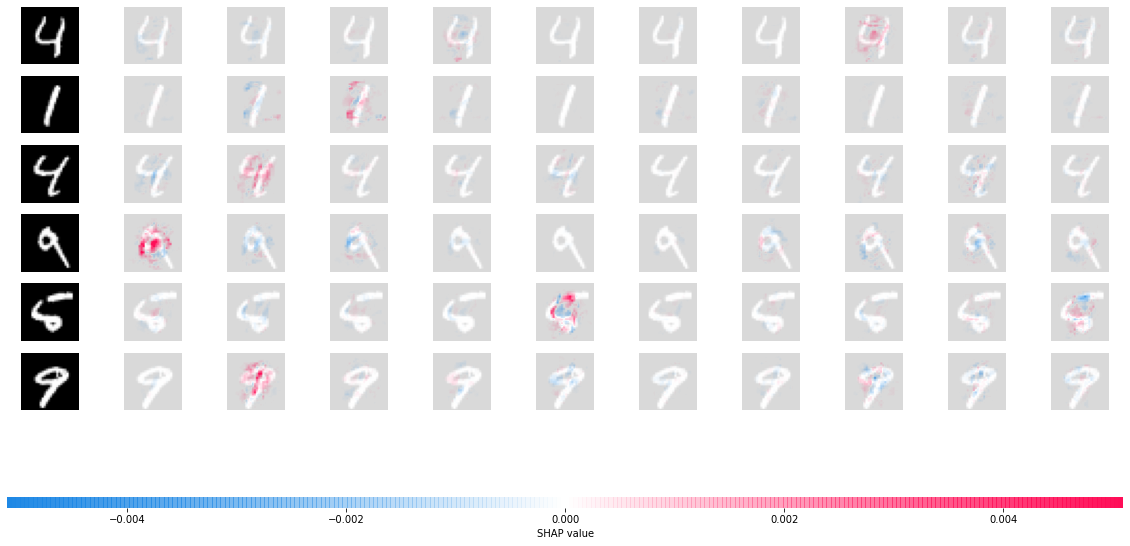

In [ ]:
shap.image_plot([shap_values[i][0] for i in range(10)], x_test[4:10])